In [81]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
df_movie=pd.read_csv('/Users/ishanpant/Downloads/movies.dat', sep = '::', encoding='latin-1', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [18]:
df_rating = pd.read_csv("/Users/ishanpant/Downloads/ratings.dat",sep='::', encoding='latin-1', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [16]:
df_user = pd.read_csv("/Users/ishanpant/Downloads/users.dat",sep='::' ,encoding='latin-1',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()


,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [17]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [19]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


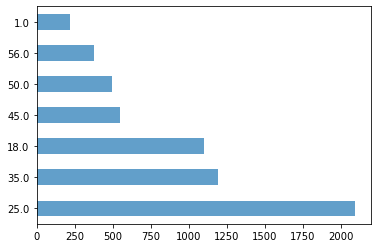

In [71]:
df['Age'].value_counts().plot(kind='barh',alpha=0.7)
plt.show()


Text(0.5, 0, 'Age')

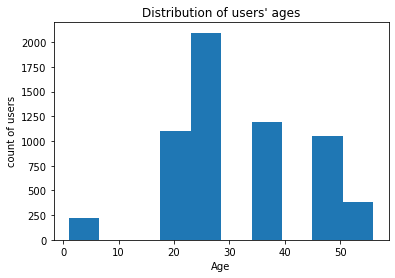

In [78]:
df.Age.plot.hist(bins=10)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [79]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


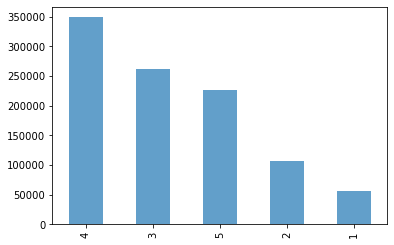

In [73]:
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()


In [24]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')

In [25]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)


MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [63]:
Toy_data = groupedby_movieName.get_group('Toys (1992)')
Toy_data.shape


(1, 13)

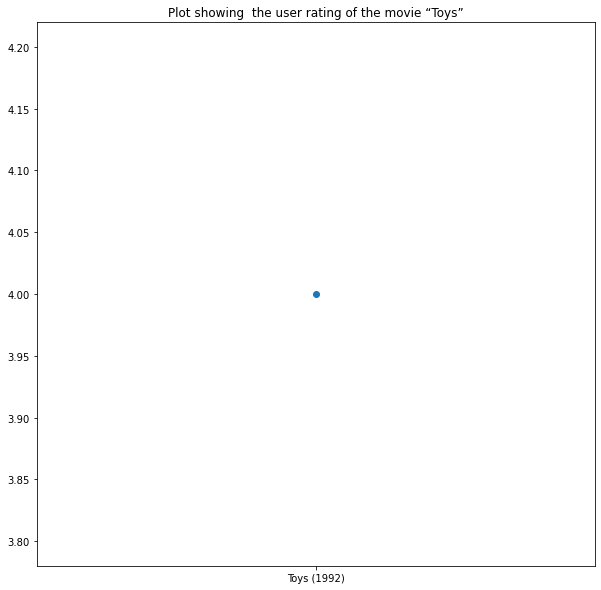

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(Toy_data['MovieName'],Toy_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toys”')
plt.show()


In [65]:
Toy_data[['MovieName','age_group']]

,MovieName,age_group
2183,Toys (1992),40-49


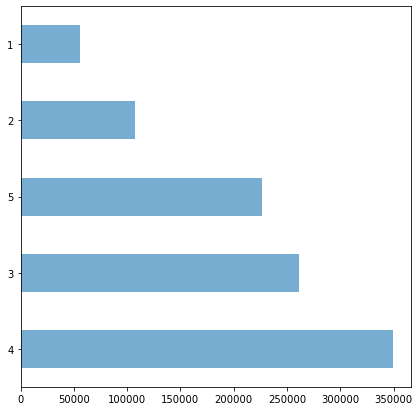

In [75]:
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [30]:
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


In [ ]:
first_500 = df[500:]
first_500.dropna(inplace=True)

In [32]:
features = first_500[['MovieID','Age','Occupation']].values
labels = first_500[['Ratings']].values
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

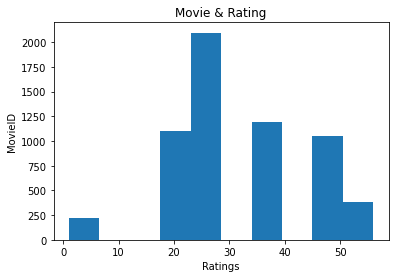

In [66]:
df.Age.plot.hist(bins=10)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

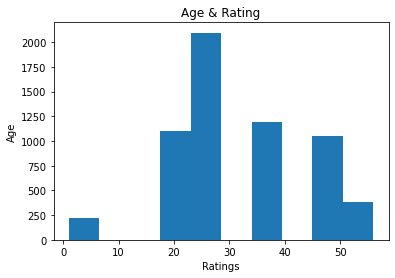

In [67]:
df.Age.plot.hist(bins=10)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

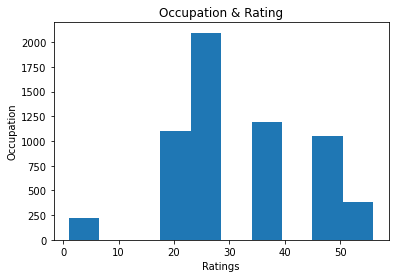

In [68]:
df.Age.plot.hist(bins=10)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [82]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

32.76

In [44]:
svc = SVC()
svc.fit(train, np.ravel(train_labels))
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

32.94

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, np.ravel(train_labels))
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

57.53

In [53]:
gaussian = GaussianNB()
gaussian.fit(train, np.ravel(train_labels))
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

32.23

In [52]:
perceptron = Perceptron()
perceptron.fit(train,np.ravel(train_labels))
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

28.61

In [83]:
linear_svc = LinearSVC()
linear_svc.fit(train, np.ravel(train_labels))
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

29.4

In [50]:
sgd = SGDClassifier()
sgd.fit(train, np.ravel(train_labels))
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

11.61

In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, np.ravel(train_labels))
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, np.ravel(train_labels))
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest


98.54

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
1,KNN,57.53
0,Support Vector Machines,32.94
2,Logistic Regression,32.76
4,Naive Bayes,32.23
5,Perceptron,28.61
7,Linear SVC,22.16
6,Stochastic Gradient Decent,11.61
